In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Load data
data_path = "/content/drive/Shareddrives/adv-ml-project/Data/"
comments = pd.read_csv(data_path + "the-reddit-climate-change-dataset-comments.csv")
posts = pd.read_csv(data_path + "the-reddit-climate-change-dataset-posts.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
comments.describe()

,created_utc,sentiment,score
count,4.600698e+06,4.543567e+06,4.600698e+06
mean,1.560607e+09,-5.827452e-03,9.552084e+00
std,7.576261e+07,6.581439e-01,1.157160e+02
min,1.262306e+09,-1.000000e+00,-2.379000e+03
25%,1.518140e+09,-6.369000e-01,1.000000e+00
50%,1.571668e+09,0.000000e+00,2.000000e+00
75%,1.622571e+09,6.249000e-01,5.000000e+00
max,1.661990e+09,1.000000e+00,3.638500e+04


In [4]:
comments.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,Yeah but what the above commenter is saying is...,0.5719,2
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,Any comparison of efficiency between solar and...,-0.9877,2
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,I'm honestly waiting for climate change and th...,-0.1143,1
3,comment,imld6cb,2qi09,sacramento,False,1661990278,https://old.reddit.com/r/Sacramento/comments/x...,Not just Sacramento. It's actually happening a...,0.0000,4
4,comment,imld0kj,2qh1i,askreddit,False,1661990206,https://old.reddit.com/r/AskReddit/comments/x2...,I think climate change tends to get some peopl...,0.6634,1


In [6]:
comments['subreddit.id'].nunique()

30945

In [7]:
comments.id.nunique()

4600698

In [8]:
comments['type'].nunique()

1

In [9]:
comments.body.isna().sum()

0

In [11]:
# Columns to drop
columns_to_drop = ['type', 'subreddit.id', 'subreddit.nsfw', 'permalink']

# Dropping columns
comments.drop(columns_to_drop, axis=1, inplace=True)



KeyError: "['type', 'subreddit.id', 'subreddit.nsfw', 'permalink'] not found in axis"

In [13]:
comments.head()

,id,subreddit.name,created_utc,body,sentiment,score
0,imlddn9,news,1661990368,Yeah but what the above commenter is saying is...,0.5719,2
1,imldbeh,ohio,1661990340,Any comparison of efficiency between solar and...,-0.9877,2
2,imldado,newzealand,1661990327,I'm honestly waiting for climate change and th...,-0.1143,1
3,imld6cb,sacramento,1661990278,Not just Sacramento. It's actually happening a...,0.0000,4
4,imld0kj,askreddit,1661990206,I think climate change tends to get some peopl...,0.6634,1


In [14]:
#counting different subreddits
def count_categories(categories):
    category_counts = {}
    for category in categories:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

    return list(category_counts.items())

subreddits = count_categories(comments['subreddit.name'])

In [15]:
subreddits

[('news', 94558),
 ('ohio', 891),
 ('newzealand', 18213),
 ('sacramento', 1161),
 ('askreddit', 259848),
 ('walkaway', 1925),
 ('pastors', 3),
 ('hudsonvalley', 23),
 ('futurology', 89945),
 ('progressive_islam', 83),
 ('collapseprep', 83),
 ('terriblefacebookmemes', 1167),
 ('socialdemocracy', 1112),
 ('portland', 5749),
 ('effectivealtruism', 621),
 ('worldnews', 351195),
 ('changemyview', 42902),
 ('tuesday', 2197),
 ('damnthatsinteresting', 8174),
 ('conspiracy', 50951),
 ('conspiracy_commons', 2252),
 ('terrifyingasfuck', 421),
 ('maine', 974),
 ('askthe_donald', 5785),
 ('civicx', 4),
 ('askwomenover30', 789),
 ('suggestmeabook', 1488),
 ('climate', 24146),
 ('urbanplanning', 1948),
 ('space', 13302),
 ('anarcho_capitalism', 6559),
 ('politicalcompassmemes', 20305),
 ('the_wild_hunt_news', 38),
 ('environment', 70444),
 ('antinatalism', 4865),
 ('asroma', 3),
 ('technology', 24145),
 ('toronto', 4069),
 ('grandrapids', 303),
 ('interestingasfuck', 17063),
 ('politics', 370018),
 

In [16]:
#Dropping subreddits that have less than "threshold" posts
sorted_subreddits = sorted(subreddits, key=lambda x: x[1], reverse=True)

def drop_tuples_below_threshold(tuples_list, threshold):
    return [t for t in tuples_list if t[1] >= threshold]

sorted_subreddits_3000 = drop_tuples_below_threshold(sorted_subreddits, 3000)
print(sorted_subreddits_3000)

[('politics', 370018), ('worldnews', 351195), ('askreddit', 259848), ('collapse', 94696), ('news', 94558), ('futurology', 89945), ('science', 71453), ('environment', 70444), ('canada', 66813), ('australia', 60239), ('conspiracy', 50951), ('unpopularopinion', 49178), ('climateskeptics', 46524), ('ukpolitics', 43179), ('changemyview', 42902), ('neoliberal', 42268), ('pics', 42233), ('europe', 37331), ('the_donald', 34106), ('canadapolitics', 31399), ('todayilearned', 30651), ('unitedkingdom', 28282), ('politicalhumor', 28203), ('bottown2', 27435), ('videos', 26813), ('politicaldiscussion', 24534), ('climate', 24146), ('technology', 24145), ('conservative', 23690), ('climatechange', 22358), ('libertarian', 21975), ('sandersforpresident', 20722), ('dataisbeautiful', 20533), ('politicalcompassmemes', 20305), ('atheism', 19640), ('australianpolitics', 19346), ('asktrumpsupporters', 18994), ('nostupidquestions', 18600), ('memes', 18217), ('newzealand', 18213), ('whitepeopletwitter', 17960), (

In [18]:
comments['created_utc'] = pd.to_datetime(comments['created_utc'], unit='s')

,id,subreddit.name,created_utc,body,sentiment,score
0,imlddn9,news,2022-08-31 23:59:28,Yeah but what the above commenter is saying is...,0.5719,2
1,imldbeh,ohio,2022-08-31 23:59:00,Any comparison of efficiency between solar and...,-0.9877,2
2,imldado,newzealand,2022-08-31 23:58:47,I'm honestly waiting for climate change and th...,-0.1143,1
3,imld6cb,sacramento,2022-08-31 23:57:58,Not just Sacramento. It's actually happening a...,0.0000,4
4,imld0kj,askreddit,2022-08-31 23:56:46,I think climate change tends to get some peopl...,0.6634,1


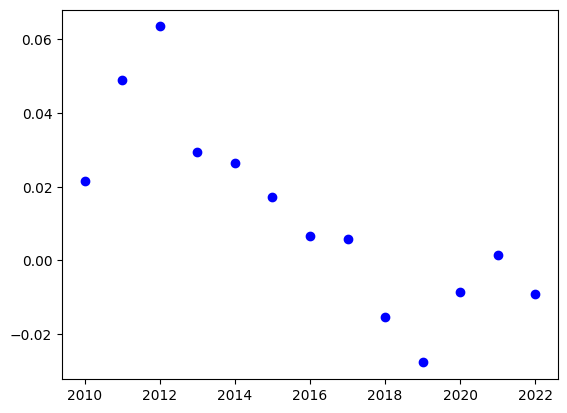

In [21]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import datetime
yearly_sentiments = comments.groupby(pd.PeriodIndex(comments['created_utc'], freq="Y"))['sentiment'].mean()

plt.scatter(yearly_sentiments.index.to_timestamp(),yearly_sentiments,color="blue")


In [22]:
def create_label(sentiment):
    if sentiment < -0.05:
        return -1
    elif sentiment >= -0.05 and sentiment <= 0.05:
        return 0
    else:
        return 1

In [23]:
comments['label'] = comments['sentiment'].apply(create_label)

In [24]:
# describing variables
comments.describe(include='all')

<ipython-input-24-9712849e96be>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  comments.describe(include='all')


,id,subreddit.name,created_utc,body,sentiment,score,label
count,4600698,4600698,4600698,4600698,4.543567e+06,4.600698e+06,4.600698e+06
unique,4600698,30889,4536099,4485881,NaN,NaN,NaN
top,imlddn9,politics,2020-08-28 11:50:28,Climate change,NaN,NaN,NaN
freq,1,370018,8,9190,NaN,NaN,NaN
first,NaN,NaN,2010-01-01 00:34:07,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-08-31 23:59:28,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,-5.827452e-03,9.552084e+00,3.402527e-03
std,NaN,NaN,NaN,NaN,6.581439e-01,1.157160e+02,9.593566e-01
min,NaN,NaN,NaN,NaN,-1.000000e+00,-2.379000e+03,-1.000000e+00
25%,NaN,NaN,NaN,NaN,-6.369000e-01,1.000000e+00,-1.000000e+00
